In [1]:
import os
os.chdir('../')
import logging
import numpy as np
logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s'
    )
# automatically reload source files
%load_ext autoreload
%autoreload 2

In [48]:
data_sheet = pd.read_csv('/home/xlv0877/proj_home/ExPert/resources/datasets/meta/filtered_datasets_hg38.csv')

In [73]:
min_mem = 100
max_mem = 240
mem_per_ds = np.maximum((data_sheet['bytes'] / data_sheet['bytes'].max() * max_mem).astype(int), min_mem)
mem_per_ds_str = mem_per_ds.astype(str) + 'GB'
mem_per_ds = mem_per_ds_str

In [74]:
conf = {}

In [75]:
for i, idx in enumerate(data_sheet.index):
    conf[idx] = mem_per_ds[i]

In [76]:
conf

{0: '100GB',
 1: '100GB',
 2: '100GB',
 3: '100GB',
 4: '240GB',
 5: '100GB',
 6: '100GB',
 7: '100GB',
 8: '100GB',
 9: '100GB',
 10: '100GB',
 11: '240GB'}

In [38]:
base_path = '/home/xlv0877/proj_home/dl/models/mixscale/n_141/lightning_logs/version_14'

In [42]:
import pandas as pd
report_p = os.path.join(base_path, 'report.csv')
report = pd.read_csv(report_p, index_col=0)

In [43]:
report['total_support'] = report['support'] / 0.1 * 0.9

In [44]:
no_ctrl = report[report.perturbation!='control']

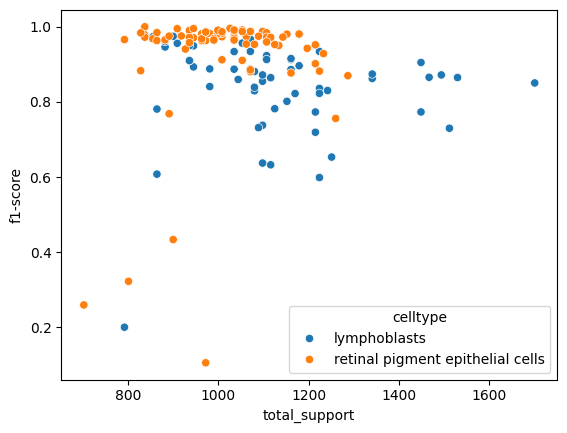

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.scatterplot(no_ctrl, x='total_support', y='f1-score', hue='celltype')

In [25]:
# --> clear correlation here, no 0% f1-scores after 300+ cells

In [30]:
# Get maximum number of cells for which we still get 0 f1
min_cells = report[report['f1-score'] == 0]['total_support'].max()

In [32]:
np.sum(report['total_support'] > min_cells)

44

In [46]:
# get latent for that model
import scanpy as sc

latent_p = os.path.join(base_path, 'latent.h5ad')
latent = sc.read(latent_p)

/home/xlv0877/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [47]:
latent.obs.cls_label.value_counts()

cls_label
lymphoblasts;CRISPRi;DNAJC8                         1666
lymphoblasts;CRISPRi;C9orf16                        1658
lymphoblasts;CRISPRi;MED19                          1642
retinal pigment epithelial cells;CRISPRi;GTF3C4     1592
lymphoblasts;CRISPRi;ANKRD11                        1586
                                                    ... 
retinal pigment epithelial cells;CRISPRi;MRPL36     1000
lymphoblasts;CRISPRi;SLC39A9                        1000
retinal pigment epithelial cells;CRISPRi;PPP6C      1000
lymphoblasts;CRISPRi;CPSF3                          1000
retinal pigment epithelial cells;CRISPRi;control    1000
Name: count, Length: 141, dtype: int64

In [ ]:
# --> control prediction f1-score is actually 0 --> include more control cells